In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Data Collection and Processing

In [2]:
customer_df = pd.read_csv("Churn_Modelling.csv")

In [3]:
customer_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
customer_df.shape

(10000, 14)

In [5]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
# Split the target and Features
X = customer_df.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)
Y = customer_df['Exited']

In [7]:
print(X)
Y

      CreditScore Geography  Gender  ...  HasCrCard  IsActiveMember  EstimatedSalary
0             619    France  Female  ...          1               1        101348.88
1             608     Spain  Female  ...          0               1        112542.58
2             502    France  Female  ...          1               0        113931.57
3             699    France  Female  ...          0               0         93826.63
4             850     Spain  Female  ...          1               1         79084.10
...           ...       ...     ...  ...        ...             ...              ...
9995          771    France    Male  ...          1               0         96270.64
9996          516    France    Male  ...          1               1        101699.77
9997          709    France  Female  ...          0               1         42085.58
9998          772   Germany    Male  ...          1               0         92888.52
9999          792    France  Female  ...          1              

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [8]:
# COnvert the categorical text coloumn into numerical(one hot encoding)
# Create the dummy variable for geogrphy and gender using get_dummies

geography = pd.get_dummies(X["Geography"], drop_first= True)
gender = pd.get_dummies(X["Gender"], drop_first=True)
print(geography)
print(gender)

      Germany  Spain
0       False  False
1       False   True
2       False  False
3       False  False
4       False   True
...       ...    ...
9995    False  False
9996    False  False
9997    False  False
9998     True  False
9999    False  False

[10000 rows x 2 columns]
       Male
0     False
1     False
2     False
3     False
4     False
...     ...
9995   True
9996   True
9997  False
9998   True
9999  False

[10000 rows x 1 columns]


In [9]:
# Concat the dummy columns with the X
X = pd.concat([X,geography, gender], axis=1)
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,France,Female,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,True,False,True


In [10]:
# Drop the original text categorical column
X = X.drop(['Geography', 'Gender'], axis = 1)
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [11]:
X.dtypes

CreditScore          int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Germany               bool
Spain                 bool
Male                  bool
dtype: object

## Model building

In [13]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [16]:
X.shape, X_train.shape, X_test.shape

((10000, 11), (8000, 11), (2000, 11))

### Data STandardization

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()

In [19]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)
print(X_test)

[[ 0.16958176 -0.46460796  0.00666099 ... -0.5698444   1.74309049
  -1.09168714]
 [-2.30455945  0.30102557 -1.37744033 ...  1.75486502 -0.57369368
   0.91601335]
 [-1.19119591 -0.94312892 -1.031415   ... -0.5698444  -0.57369368
  -1.09168714]
 ...
 [ 0.9015152  -0.36890377  0.00666099 ... -0.5698444  -0.57369368
   0.91601335]
 [-0.62420521 -0.08179119  1.39076231 ... -0.5698444   1.74309049
  -1.09168714]
 [-0.28401079  0.87525072 -1.37744033 ...  1.75486502 -0.57369368
  -1.09168714]]
[[-0.55204276 -0.36890377  1.04473698 ...  1.75486502 -0.57369368
  -1.09168714]
 [-1.31490297  0.10961719 -1.031415   ... -0.5698444  -0.57369368
  -1.09168714]
 [ 0.57162971  0.30102557  1.04473698 ... -0.5698444   1.74309049
  -1.09168714]
 ...
 [-0.74791227 -0.27319958 -1.37744033 ... -0.5698444   1.74309049
   0.91601335]
 [-0.00566991 -0.46460796 -0.33936434 ...  1.75486502 -0.57369368
   0.91601335]
 [-0.79945688 -0.84742473  1.04473698 ...  1.75486502 -0.57369368
   0.91601335]]


### ANN Model with Hyperparamter tunning

In [22]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Activation, Embedding, Flatten, LeakyReLU, BatchNormalization
from keras.activations import relu, sigmoid
from keras.layers import Dropout
# pip install scikeras
from scikeras.wrappers import KerasClassifier
#from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [55]:
# Create a function for the model
def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i == 0:
            model.add(Dense(nodes, input_dim = X_train.shape[1]))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
            
    model.add(Dense(units = 1, kernel_initializer='glorot_uniform', activation = 'sigmoid'))
    model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [73]:
# Call model using KerasClassifier
model = KerasClassifier(model=create_model, verbose=0)

In [74]:
# Hyperparameters
model__layers = [[20], [40,20], [45, 30, 15]]
model__activations = ['sigmoid', 'relu']
model__param_grid = dict(model__layers = model__layers, 
                         model__activation = model__activations, 
                         batch_size = [128, 256], epochs = [30])

In [75]:
# Grid Search CV
grid = GridSearchCV(estimator=model, param_grid=model__param_grid, cv =5)
grid_result = grid.fit(X_train, Y_train)

In [68]:
grid_result.best_score_, grid_result.best_params_

(0.8558749999999999,
 {'batch_size': 128,
  'epochs': 30,
  'model__activation': 'relu',
  'model__layers': [45, 30, 15]})

In [61]:
# Make the prediction 
pred_y = grid.predict(X_test)
y_pred = (pred_y > 0.5)
y_pred

16/16 [==============================] - 0s 569us/step


array([False, False, False, ..., False, False, False])

[[1550   45]
 [ 222  183]]


Text(50.722222222222214, 0.5, 'True Values')

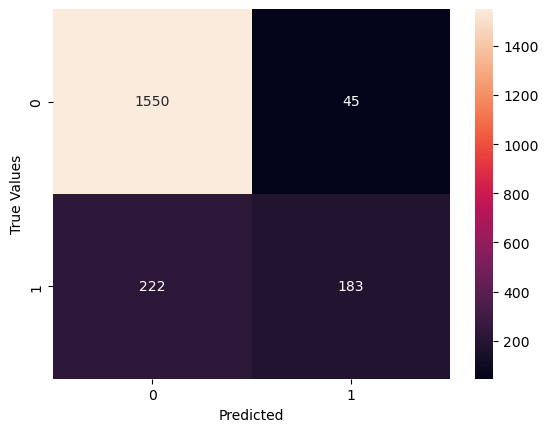

In [63]:
# Getting the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, y_pred)

print(cm)

# Plot the confusion matrix
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('True Values')

In [64]:
# Accuracy Score
score = accuracy_score(y_pred, Y_test)
print("Accuracy Score for the model: ", score)

Accuracy Score for the model:  0.8665
